In [10]:
pip install tensorflow

     ------------------------------------ 455.9/455.9 MB 462.9 kB/s eta 0:00:00
     -------------------------------------- 895.7/895.7 kB 5.6 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 781.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd
import numpy as np
import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential


In [4]:
df = pd.read_csv(r"data.csv")
df


,Date,Bought,Sold,NV,Lost
0,2013-01-01,735422368.7,712147000.0,403465.600,2.287190e+07
1,2013-02-01,657988856.3,640633717.3,347800.550,1.700734e+07
2,2013-03-01,663373030.9,649168952.2,357794.550,1.384628e+07
3,2013-04-01,533983791.4,519744979.3,255663.800,1.398315e+07
4,2013-05-01,493381739.3,481595212.5,196548.400,1.158998e+07
...,...,...,...,...,...
105,2021-10-01,514226362.7,506857003.8,316669.565,7.052689e+06
106,2021-11-01,541704980.8,532236963.9,356965.930,9.111051e+06
107,2021-12-01,705779288.1,696793547.9,462805.350,8.522935e+06
108,2022-01-01,743431196.2,731220808.8,490604.900,1.171978e+07


In [5]:
for col in df.columns:
    print(col)

df.columns = df.columns.str.strip()
#df['Month']=df['Month'].str.strip()
#df['Date'] = pd.to_datetime(['{}-{}-01'.format(y, m)for y, m in zip(df.Year, df.Month)])
#pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

#for time series analysis date must be set as index
df = df.set_index('Date')
df1 = df.filter(['Bought', 'Sold', 'NV', 'Lost'], axis=1)
df1.to_csv('data.csv')
df1 = df.filter(['Sold'], axis=1)
df1.head()

Date
Bought
Sold
NV
Lost


,Sold
Date,
2013-01-01,712147000.0
2013-02-01,640633717.3
2013-03-01,649168952.2
2013-04-01,519744979.3
2013-05-01,481595212.5


In [6]:
def convert2matrix(data_arr, look_back):
 X, Y = [], []
 for i in range(len(data_arr)-look_back):
  d = i+look_back
  X.append(data_arr[i:d, 0])
  Y.append(data_arr[d, 0])
 return np.array(X), np.array(Y)


In [18]:
df1 = pd.read_csv('data.csv')
df1 = df.filter(['Sold'], axis=1)
#Split data set into testing dataset and train dataset
train_size = 90
train, test = df1.values[0:train_size,
                         :], df1.values[train_size:len(df1.values), :]
# setup look_back window
look_back = 12
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

def model_dnn(look_back):
    model = Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',
                  optimizer='adam', metrics=['mse', 'mae'])
    return model


In [26]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 2013-01-01 to 2022-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sold    110 non-null    float64
dtypes: float64(1)
memory usage: 1.7+ KB


In [27]:
model=model_dnn(look_back)
history=model.fit(trainX,trainY, epochs=100, batch_size=30, verbose=1, validation_data=(testX,testY),callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

Train on 78 samples, validate on 8 samples
Epoch 1/100
78/78 [==============================] - 1s 7ms/step - loss: 231524200463587488.0000 - mse: 231524215000399872.0000 - mae: 474959648.0000 - val_loss: 253908914532253696.0000 - val_mse: 253908914532253696.0000 - val_mae: 498101408.0000
Epoch 2/100
78/78 [==============================] - 0s 114us/step - loss: 175189998016921600.0000 - mse: 175190015196790784.0000 - mae: 410934400.0000 - val_loss: 177506737736122368.0000 - val_mse: 177506737736122368.0000 - val_mae: 414086432.0000
Epoch 3/100
78/78 [==============================] - 0s 119us/step - loss: 118955352912177008.0000 - mse: 118955355555233792.0000 - mae: 334941152.0000 - val_loss: 111495023131885568.0000 - val_mse: 111495023131885568.0000 - val_mae: 324270848.0000
Epoch 4/100
78/78 [==============================] - 0s 265us/step - loss: 70382956224446464.0000 - mse: 70382951929479168.0000 - mae: 251760960.0000 - val_loss: 62103530588078080.0000 - val_mse: 6210353058807808

In [28]:
def model_loss(history):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show()


Train Root Mean Squared Error(RMSE): 69660310.44; Train Mean Absolute Error(MAE) : 4852558740848640.00 
Test Root Mean Squared Error(RMSE): 79595107.69; Test Mean Absolute Error(MAE) : 6335381167407104.00 


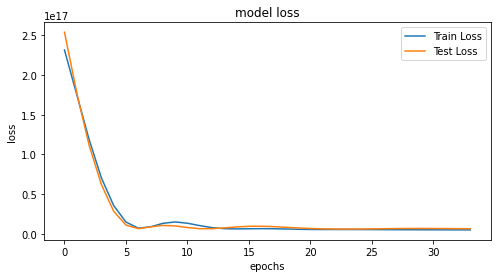

In [29]:
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f '
      % (np.sqrt(train_score[0]), train_score[1]))
test_score = model.evaluate(testX, testY, verbose=0)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f '
      % (np.sqrt(test_score[0]), test_score[1]))
model_loss(history)


In [35]:
#trainX=trainX.reshape(trainX.shape[0], 1, trainX.shape[1]) 
lstm_model = Sequential()
lstm_model.add(LSTM(80,activation="sigmoid",return_sequences=True, input_shape=(trainX.shape[1:])))
lstm_model.add(Dropout(0.15))
lstm_model.add(LSTM(40,activation="sigmoid",return_sequences=True))
lstm_model.add(Dropout(0.15))
lstm_model.add(LSTM(20,activation="sigmoid",return_sequences=False))
lstm_model.add(Dropout(0.15))
lstm_model.add(Dense(1))
lstm_model.summary()

lstm_model.compile(optimizer="adam",loss="MSE")
lstm_model.fit(trainX, trainY, epochs=300, batch_size=36)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 1, 80)             29760     
_________________________________________________________________
dropout_19 (Dropout)         (None, 1, 80)             0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 1, 40)             19360     
_________________________________________________________________
dropout_20 (Dropout)         (None, 1, 40)             0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 20)                4880      
_________________________________________________________________
dropout_21 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)               

78/78 [==============================] - 0s 205us/step - loss: 278534094987057312.0000
Epoch 71/300
78/78 [==============================] - 0s 302us/step - loss: 278534100273170912.0000
Epoch 72/300
78/78 [==============================] - 0s 178us/step - loss: 278534089700943712.0000
Epoch 73/300
78/78 [==============================] - 0s 308us/step - loss: 278534094987057312.0000
Epoch 74/300
78/78 [==============================] - 0s 186us/step - loss: 278534102916227712.0000
Epoch 75/300
78/78 [==============================] - 0s 171us/step - loss: 278534087057886944.0000
Epoch 76/300
78/78 [==============================] - 0s 179us/step - loss: 278534100273170912.0000
Epoch 77/300
78/78 [==============================] - 0s 181us/step - loss: 278534102916227712.0000
Epoch 78/300
78/78 [==============================] - 0s 249us/step - loss: 278534088379415296.0000
Epoch 79/300
78/78 [==============================] - 0s 174us/step - loss: 278534081771773312.0000
Epoch 80/300


78/78 [==============================] - 0s 186us/step - loss: 278534094987057312.0000
Epoch 152/300
78/78 [==============================] - 0s 184us/step - loss: 278534105559284480.0000
Epoch 153/300
78/78 [==============================] - 0s 230us/step - loss: 278534085736358528.0000
Epoch 154/300
78/78 [==============================] - 0s 200us/step - loss: 278534089700943712.0000
Epoch 155/300
78/78 [==============================] - 0s 204us/step - loss: 278534089700943712.0000
Epoch 156/300
78/78 [==============================] - 0s 219us/step - loss: 278534098951642496.0000
Epoch 157/300
78/78 [==============================] - 0s 186us/step - loss: 278534100273170912.0000
Epoch 158/300
78/78 [==============================] - 0s 207us/step - loss: 278534089700943712.0000
Epoch 159/300
78/78 [==============================] - 0s 193us/step - loss: 278534094987057312.0000
Epoch 160/300
78/78 [==============================] - 0s 201us/step - loss: 278534098951642496.0000
Epoc

78/78 [==============================] - 0s 165us/step - loss: 278534085736358528.0000
Epoch 233/300
78/78 [==============================] - 0s 174us/step - loss: 278534108202341280.0000
Epoch 234/300
78/78 [==============================] - 0s 208us/step - loss: 278534093665528928.0000
Epoch 235/300
78/78 [==============================] - 0s 186us/step - loss: 278534106880812896.0000
Epoch 236/300
78/78 [==============================] - 0s 170us/step - loss: 278534085736358528.0000
Epoch 237/300
78/78 [==============================] - 0s 178us/step - loss: 278534094987057312.0000
Epoch 238/300
78/78 [==============================] - ETA: 0s - loss: 284538525343285248.00 - 0s 173us/step - loss: 278534096308585728.0000
Epoch 239/300
78/78 [==============================] - 0s 213us/step - loss: 278534080450244896.0000
Epoch 240/300
78/78 [==============================] - 0s 211us/step - loss: 278534079128716544.0000
Epoch 241/300
78/78 [==============================] - 0s 213us/s

In [36]:
#testX=testX.reshape(testX.shape[0], 1, testX.shape[1]) 

lstm_predictions = lstm_model.predict(testX)

lstm_score = r2_score(testY, lstm_predictions)
print("R^2 Score of LSTM model = ",lstm_score)


R^2 Score of LSTM model =  -49.95090674118526


In [37]:
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual power consumption data')
    plt.plot(predicted, alpha=0.7, color='orange',label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()

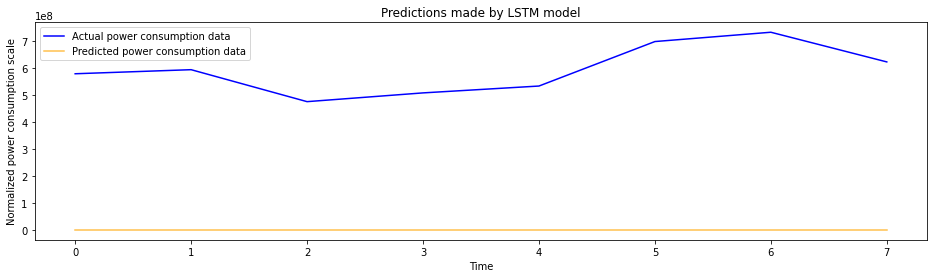

In [38]:
plot_predictions(testY, lstm_predictions, "Predictions made by LSTM model")